# Pymaceuticals Inc.
---

### Analysis

- From the Bar graph we can see that Drug Regimen Capomulin and Ramicane have the maximum number of observed timepoints and , and Propriva has the smaller number.By removing duplicates the total number of mice is 248. 
- From the Pie chart it is observable that 49% of the mice are female and 51% are male.
- From the boxplots we can observe that there is only 1 outlier in the Infubinol regiment from the 4 drugs selected (Capomulin, Ramicane, Infubinol, Ceftamin).
- The value of the correlation between mouse weight and average tumor volume is 0.84. It indicates a strong correlation between the independent variable (mouse weight) and the dependent variable (tumor volume). In the Capomulin regimen the heavier the mice the tumor volume increases.
- With a R-squared value of 0.709 we can conclude that 70% of the data of the tumor volume variation can be explained by the weight data.
 

In [1]:
# Dependencies and Setup
%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [2]:
#Print column titles for mouse metadata
mouse_metadata.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'], dtype='object')

In [3]:
#Print column titles for study results
study_results.columns

Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'], dtype='object')

In [4]:
# Combine the data into a single DataFrame after checking that Mouse ID is the common column
pharma_data_complete = pd.merge(mouse_metadata, study_results , how="outer", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
pharma_data_complete.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
# Checking the number of mice.
mice_count = len(pharma_data_complete["Mouse ID"].unique())
mice_count

249

In [6]:
# The data should be uniquely identified by Mouse ID and Timepoint
# we proceeed to get the duplicate mice by ID number that show up for Mouse ID and Timepoint. 
duplicate_mice = pharma_data_complete.loc[pharma_data_complete.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [7]:
# Optional: Get all the data for the duplicate mouse ID. (from the previous finding that g989 is duplicated)
dup_g989 = pharma_data_complete.loc[pharma_data_complete["Mouse ID"] == "g989", :]
dup_g989

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
final_df = pharma_data_complete[pharma_data_complete['Mouse ID'].isin(duplicate_mice)==False]
final_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [9]:
# Checking the number of mice in the new clean DataFrame.
new_mice_count = len(final_df["Mouse ID"].unique())
new_mice_count

248

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM (standard error of the mean) of the tumor volume.
# Display the Summary statistics table grouped by 'Drug Regimen' column
mean = final_df['Tumor Volume (mm3)'].groupby(final_df['Drug Regimen']).mean()
median = final_df['Tumor Volume (mm3)'].groupby(final_df['Drug Regimen']).median()
var = final_df['Tumor Volume (mm3)'].groupby(final_df['Drug Regimen']).var()
std = final_df['Tumor Volume (mm3)'].groupby(final_df['Drug Regimen']).std()
sem = final_df['Tumor Volume (mm3)'].groupby(final_df['Drug Regimen']).sem()

# Assemble the resulting series into a single summary DataFrame.
stat_summary = pd.DataFrame({"Mean Tumor Volume":mean, 
                            "Median Tumor Volume":median, 
                           "Tumor Volume Variance":var, 
                           "Tumor Volume Std. Dev.":std, 
                           "Tumor Volume Std. Err.":sem})

stat_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
stat_agg_summary =  final_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
stat_agg_summary

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# first count the mice tiempoints grouping by Drug regimen
count_mice_per_timepoint = final_df["Drug Regimen"].value_counts()
count_mice_per_timepoint

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

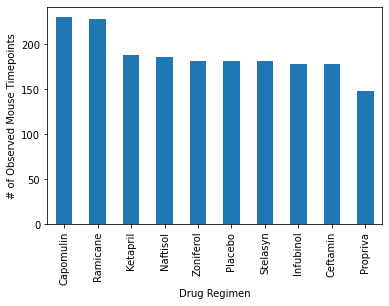

In [13]:
# then we create the bar plot with pandas
mice_bar = count_mice_per_timepoint.plot.bar(color ="#1f77b4")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

In [14]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = final_df["Drug Regimen"].sort_values()
unique_x_axis = x_axis.unique()
unique_x_axis

array(['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol',
       'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],
      dtype=object)

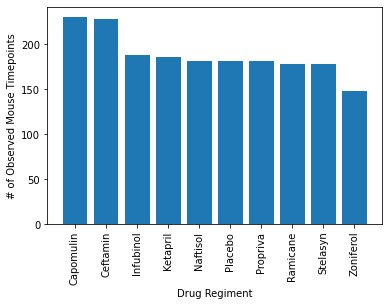

In [15]:
# plot with pyplot
plt.bar(unique_x_axis, count_mice_per_timepoint, color="#1f77b4")
plt.xticks(rotation=90)
plt.xlabel("Drug Regiment")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

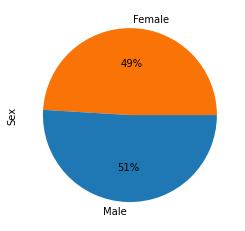

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex = final_df.groupby("Sex")

sex_count=sex['Mouse ID'].count()
sex_count

sexpiechart = sex_count.plot(kind='pie',autopct="%1.0f%%",colors=['#f97306','#1f77b4'], startangle=0)
sexpiechart

sexpiechart.set_ylabel('Sex')
plt.show()

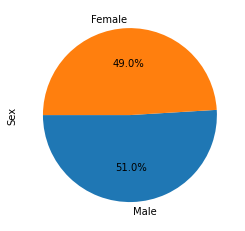

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex2 = final_df["Sex"].value_counts()
sex2.plot.pie(autopct= "%1.1f%%", startangle=180)
plt.show()

## Quartiles, Outliers and Boxplots

In [18]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = pd.DataFrame(\
        final_df.groupby('Mouse ID')['Timepoint'].max().sort_values(ascending = False)).reset_index().\
        rename(columns={'Timepoint': 'max_timepoint'})
max_timepoint

,Mouse ID,max_timepoint
0,a203,45
1,l897,45
2,m546,45
3,m550,45
4,m601,45
...,...,...
243,d133,0
244,b447,0
245,u153,0
246,v199,0


In [19]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merge_df = pd.merge(final_df, max_timepoint, on=["Mouse ID"])
merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,max_timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45
...,...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25,63.145652,2,45
1876,z969,Naftisol,Male,9,30,30,65.841013,3,45
1877,z969,Naftisol,Male,9,30,35,69.176246,4,45
1878,z969,Naftisol,Male,9,30,40,70.314904,4,45


In [20]:
# Put treatments into a list for for loop (and later for plot labels)
drug_list=["Capomulin","Ramicane","Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
drugs_names= []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drugs in drug_list:
    
    info_df = merge_df.loc[merge_df["Drug Regimen"] == drugs]
    
    # Create subset dataframes that narrow down to rows only containing the final timepoint for each regimen
    final_timepoint_df = info_df.loc[info_df['Timepoint'] == info_df['max_timepoint']]
    
    # Create a series that consists of all final volume values for each regimen
    finalvalues = final_timepoint_df['Tumor Volume (mm3)']
    drugs_names.append(finalvalues)
    
    # Calculate and print the interquartile range (IQR) for each regimen
    quartiles = finalvalues.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    #print(f'The IQR for {drugs}: {iqr}')
    
    # Find upper and lower bounds to help identify outliers for each regimen
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    #print(f'The Lower Bound for {drugs}: {lower_bound}')
    #print(f'The Upper Bound for {drugs}: {upper_bound}')
    
    # Quantitatively check for outliers
    outliers = (finalvalues.loc[(final_timepoint_df['Tumor Volume (mm3)'] >= upper_bound) | 
                                        (final_timepoint_df['Tumor Volume (mm3)'] <= lower_bound)]).count()
    print(f'{drugs} potential outliers: {outliers}')

Capomulin potential outliers: 0
Ramicane potential outliers: 0
Infubinol potential outliers: 1
Ceftamin potential outliers: 0


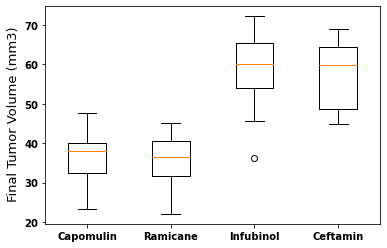

In [21]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

fig1, ax1 = plt.subplots()
ax1.set_ylabel(' Final Tumor Volume (mm3)',fontsize=13)
ax1.boxplot(drugs_names)
ax1.set_xticklabels(drug_list)
plt.xticks(fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')
plt.show()

## Line and Scatter Plots

In [22]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# First check the mice treated with Capomulin
Capomulin= final_df.loc[final_df["Drug Regimen"] == "Capomulin",:]
Capomulin

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [23]:
# select 1 mouse for the graph
line_df = Capomulin.loc[Capomulin["Mouse ID"] == "i557",:]
line_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
431,i557,Capomulin,Female,1,24,0,45.000000,0
432,i557,Capomulin,Female,1,24,5,42.261665,0
433,i557,Capomulin,Female,1,24,10,42.992077,0
434,i557,Capomulin,Female,1,24,15,43.529876,0
435,i557,Capomulin,Female,1,24,20,43.967895,0


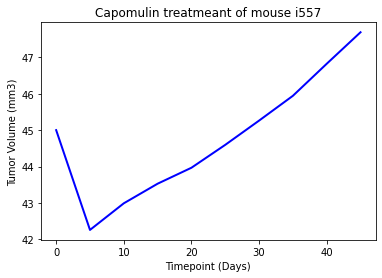

In [24]:
# Plot the line plot of tumor volume vs. time point for a single mouse treated with Capomulin
x_axis = line_df["Timepoint"]
y_axis = line_df["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
plt.title('Capomulin treatmeant of mouse i557')
plt.plot(x_axis, y_axis, linewidth=2,color="blue")
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

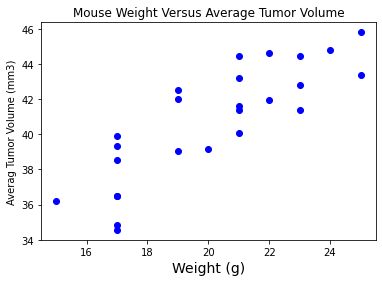

In [25]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
fig1, ax1 = plt.subplots()
avg_capomulin_vol =Capomulin.groupby(['Mouse ID']).mean()

marker_size=15
plt.scatter(avg_capomulin_vol['Weight (g)'],avg_capomulin_vol['Tumor Volume (mm3)'], color="blue")
plt.title('Mouse Weight Versus Average Tumor Volume')
plt.xlabel('Weight (g)',fontsize =14)
plt.ylabel('Averag Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84
The r-squared is: 0.709


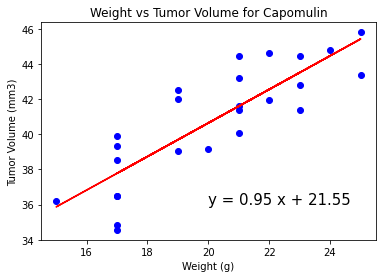

In [26]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(avg_capomulin_vol['Weight (g)'],avg_capomulin_vol['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

(slope, intercept,rvalue, pvalue, stderr)= linregress(avg_capomulin_vol["Weight (g)"],avg_capomulin_vol["Tumor Volume (mm3)"])
regress_values=avg_capomulin_vol["Weight (g)"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(avg_capomulin_vol["Weight (g)"],avg_capomulin_vol["Tumor Volume (mm3)"],color="blue")
plt.plot(avg_capomulin_vol["Weight (g)"], regress_values, color="red")
plt.annotate(line_eq,(20,36), fontsize=15)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume for Capomulin")
print(f"The r-squared is: {round(rvalue**2,3)}")
plt.show()